<a href="https://colab.research.google.com/github/KeremAydin98/tensorflow-documentation/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial demonstrates data augmentation: a technique to increase the diversity of your training set by applying random (but realistic) transformations, such as image rotation.

In [ ]:
import tensorflow_datasets as tfds

# By using as_supervised=True, you can get a tuple (features, label) instead for supervised datasets.

(train_ds, val_ds, test_ds), metadata = tfds.load('tf_flowers', split=["train[:75%]","train[75%:90%]","train[90%:]"], with_info=True, as_supervised=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to ~/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
num_classes = metadata.features["label"].num_classes
get_label_name = metadata.features['label'].int2str

In [ ]:
example = train_ds.take(1)

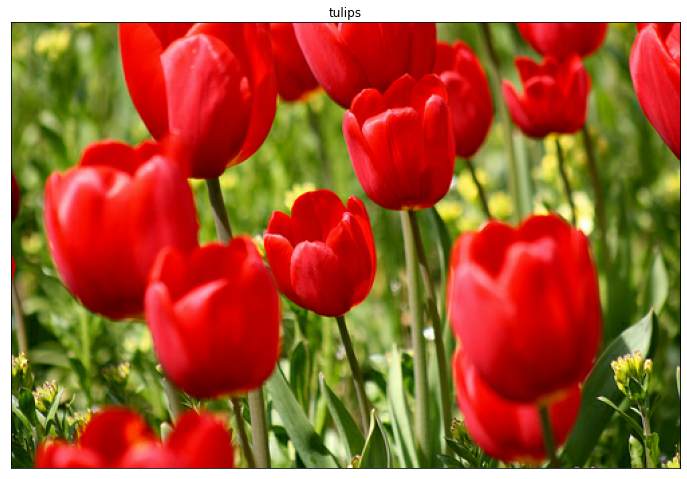

In [ ]:
import matplotlib.pyplot as plt

for image, label in example:


  plt.figure(figsize=(12,12))
  plt.imshow(image) 
  plt.xticks([])
  plt.yticks([])
  plt.title(get_label_name(label))

plt.show() 

In [ ]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1/255),
    tf.keras.layers.Resizing(height=100, width=200)
])

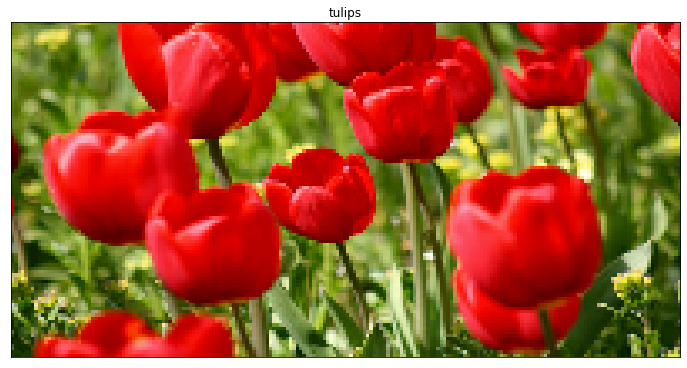

In [ ]:
for image, label in example:


  plt.figure(figsize=(12,12))
  plt.imshow(data_augmentation(image)) 
  plt.xticks([])
  plt.yticks([])
  plt.title(get_label_name(label))

plt.show() 

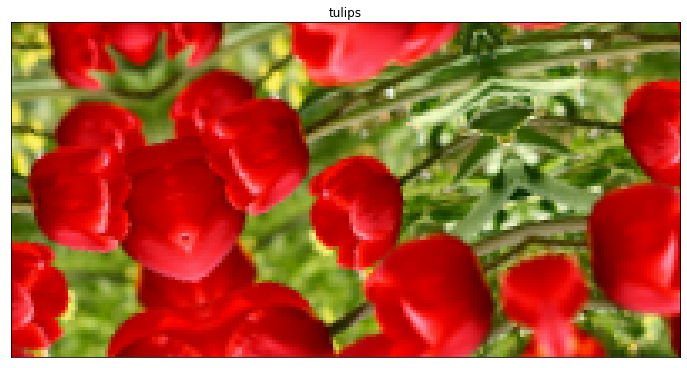

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1/255),
    tf.keras.layers.Resizing(height=100, width=200),
    tf.keras.layers.RandomRotation(0.4)
])

for image, label in example:


  plt.figure(figsize=(12,12))
  plt.imshow(data_augmentation(image)) 
  plt.xticks([])
  plt.yticks([])
  plt.title(get_label_name(label))

plt.show() 

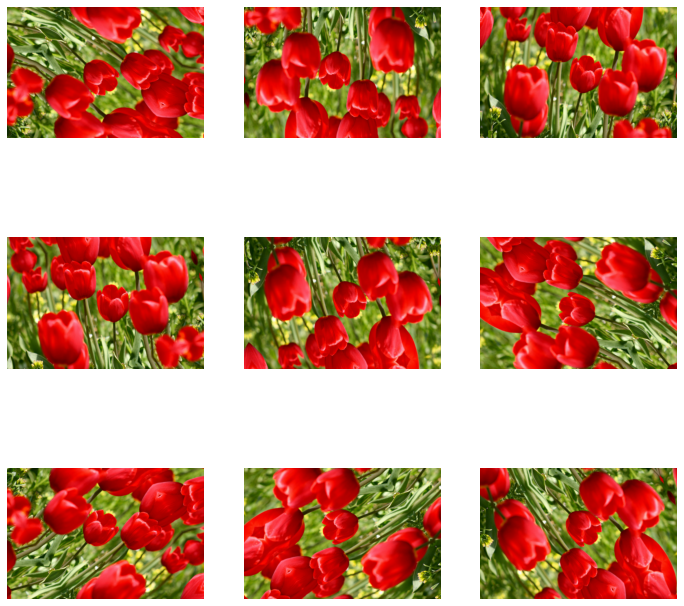

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
])

plt.figure(figsize=(12,12))
for i in range(9):

  aug_img = data_augmentation(image)

  ax = plt.subplot(3,3,i+1)
  plt.imshow(aug_img/255)
  plt.axis("off")

plt.show()

Custom Data Augmentations

You can also create custom data augmentation layers.

This section of the tutorial shows two ways of doing so:

    First, you will create a tf.keras.layers.Lambda layer. This is a good way to write concise code.
    Next, you will write a new layer via subclassing, which gives you more control.

### With a custom function

In [ ]:
# Inverting colors
def invert_color(img, factor=0.5):

  if tf.random.uniform([]) < factor:

    return 255 - image

  return image

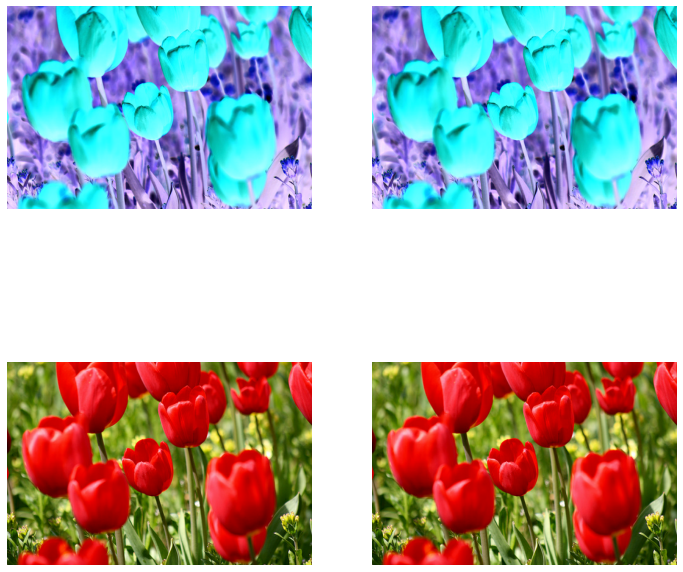

In [ ]:
plt.figure(figsize=(12,12))
for i in range(4):

  plt.subplot(2,2,i+1)
  plt.imshow(invert_color(image))
  plt.axis('off')

plt.show()

### With implementing a custom layer by subclassing

In [ ]:
class RandomInvert(tf.keras.layers.Layer):

  def __init__(self, factor=5, **kwargs):

    super().__init__(**kwargs)
    self.factor = factor

  def call(self, image):

    if tf.random.uniform([]) < self.factor:

      return 255 - image

    return image

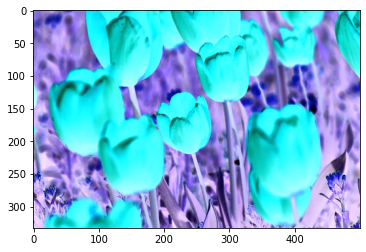

In [ ]:
invert = RandomInvert()
inverted = invert(image)

plt.imshow(inverted / 255)